In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


<AxesSubplot:ylabel='count'>

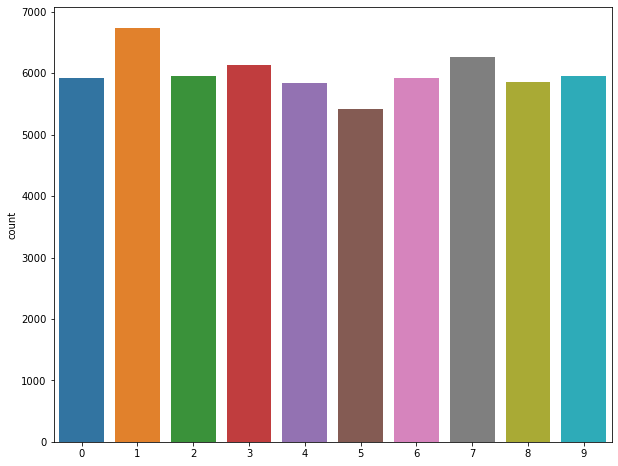

In [3]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train)

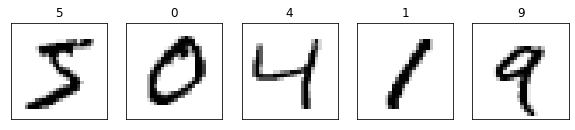

In [4]:
fig, axes = plt.subplots(ncols=5, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [5]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 128)       512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 64)        256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 319s 187ms/step - loss: 0.2681 - accuracy: 0.9215 - val_loss: 0.0881 - val_accuracy: 0.9815
Epoch 2/10
1688/1688 [==============================] - 323s 191ms/step - loss: 0.1109 - accuracy: 0.9682 - val_loss: 0.0794 - val_accuracy: 0.9822
Epoch 3/10
1688/1688 [==============================] - 321s 190ms/step - loss: 0.0898 - accuracy: 0.9747 - val_loss: 0.0794 - val_accuracy: 0.9850
Epoch 4/10
1688/1688 [==============================] - 321s 190ms/step - loss: 0.0745 - accuracy: 0.9783 - val_loss: 0.0938 - val_accuracy: 0.9848
Epoch 5/10
1688/1688 [==============================] - 324s 192ms/step - loss: 0.0680 - accuracy: 0.9801 - val_loss: 0.1605 - val_accuracy: 0.9778
Epoch 6/10
1688/1688 [==============================] - 367s 217ms/step - loss: 0.0569 - accuracy: 0.9836 - val_loss: 0.1042 - val_accuracy: 0.9833
Epoch 7/10
1688/1688 [==============================] - 323s 191ms/step - loss: 0.0534 - accuracy: 0.9839 - val_

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax

In [13]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 10s 30ms/step - loss: 3.1025 - accuracy: 0.9888
Test Loss 3.102480173110962
Test Accuracy 0.9887999892234802


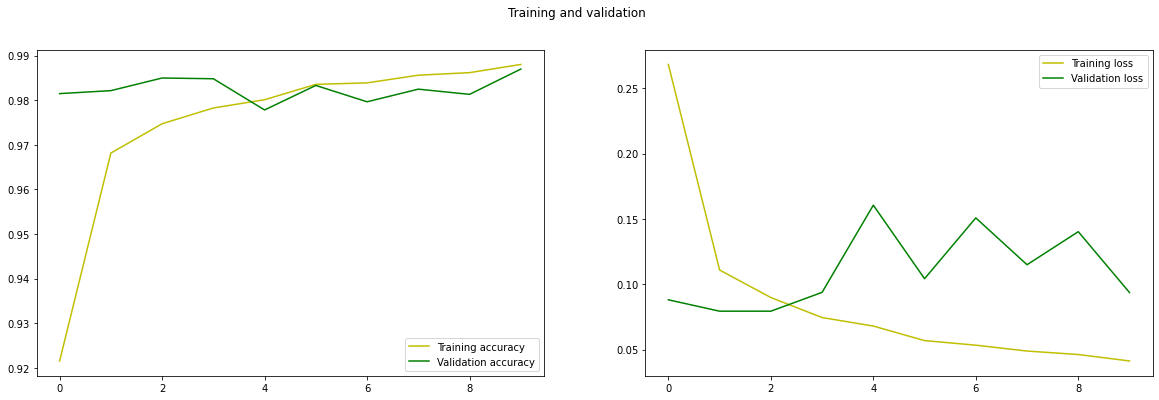

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [15]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 9s 27ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    1,    0,    0,    1,    6,    1,    0,    0],
       [   3, 1120,    3,    1,    1,    0,    7,    0,    0,    0],
       [   1,    1, 1027,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    3, 1003,    0,    1,    0,    2,    1,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    1,    1],
       [   0,    0,    0,    6,    0,  882,    4,    0,    0,    0],
       [   1,    2,    0,    0,    2,    3,  949,    0,    1,    0],
       [   0,    1,   12,    0,    1,    0,    0, 1014,    0,    0],
       [   5,    0,    2,    1,    2,    0,    0,    2,  960,    2],
       [   2,    0,    0,    1,   13,    2,    0,    1,    7,  983]])>

Text(69.0, 0.5, 'Truth')

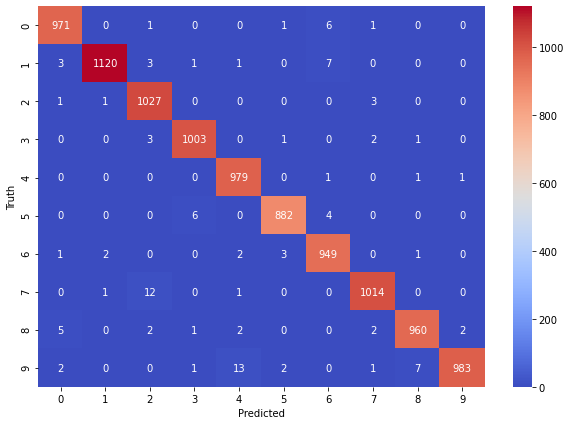

In [16]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

313/313 [==============================] - 8s 25ms/step
Predicted Value:  4
Successful prediction


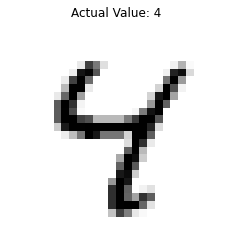

In [18]:
plt.imshow(x_test[6],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[6]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[6]))
if(y_test[6]==(np.argmax(prediction[6]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 8s 25ms/step
Predicted Value:  0
Successful prediction


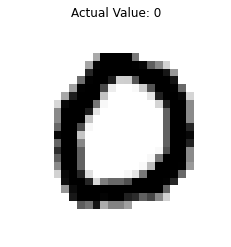

In [19]:
plt.imshow(x_test[71],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[71]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[71]))
if(y_test[71]==(np.argmax(prediction[71]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')